<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/no_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**mount drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


**import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**set path**

In [3]:
path = '/gdrive/My Drive/'

**import datasets**

In [ ]:
data_train_test = pd.read_csv(path +'Copy of train.psv', sep='|')

In [5]:
data_train_test.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,99.0,100.0,NaN,NaN,71.0,NaN,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,2,0
1,97.5,100.0,NaN,NaN,NaN,NaN,15.0,NaN,-16.0,16.0,NaN,7.19,25.0,NaN,72.5,13.5,58.0,8.1,112.5,1.7,NaN,73.0,8.6,1.75,3.2,4.4,3.65,NaN,26.9,8.35,74.4,15.65,104.0,93.0,69.66,0,1.0,0.0,-0.02,3,0
2,96.0,100.0,NaN,NaN,70.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,4,0
3,100.0,99.0,NaN,NaN,75.0,NaN,14.0,NaN,-15.0,11.0,NaN,7.24,24.0,96.0,NaN,12.0,NaN,7.7,113.0,1.6,NaN,85.0,8.9,1.60,2.9,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,5,0
4,102.0,100.0,36.00,NaN,74.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,6,0
5,92.0,100.0,NaN,NaN,79.0,NaN,14.0,NaN,-13.0,10.0,NaN,7.29,22.0,NaN,68.0,11.0,49.0,7.3,115.0,1.5,NaN,78.0,7.4,1.60,2.6,4.7,3.40,NaN,27.0,8.40,55.0,15.60,NaN,80.0,69.66,0,1.0,0.0,-0.02,7,0
6,90.0,100.0,NaN,NaN,62.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,8,0
7,95.0,99.0,NaN,151.0,93.0,67.0,21.0,NaN,-11.0,NaN,NaN,7.36,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,9,0
8,92.0,100.0,36.89,94.0,64.0,49.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,10,0
9,91.0,100.0,36.72,106.0,68.0,51.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,11,0


In [6]:
data_train_test.shape

(1167202, 41)

In [7]:
data_val = pd.read_csv(path + 'validation.psv', sep='|')

In [8]:
data_val.shape

(191344, 41)

In [9]:
data_val.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,1,0
1,78.0,95.0,NaN,182.0,94.0,65.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,2,0
2,84.0,92.0,NaN,183.0,113.0,72.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,3,0
3,86.0,94.0,NaN,190.0,101.0,69.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,4,0
4,83.0,91.5,NaN,194.5,111.5,82.5,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,5,0
5,83.0,91.5,36.8,173.5,100.0,72.5,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,6,0
6,83.0,92.5,NaN,158.5,84.5,56.5,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.2,9.4,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,7,0
7,82.0,91.0,NaN,144.0,100.0,66.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,8,0
8,80.0,91.0,NaN,126.0,92.0,64.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,9,0
9,68.0,90.0,37.0,119.0,64.0,46.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,10,0


In [10]:
data_val_copy = data_val.copy()

In [11]:
data_val_copy.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,1,0
1,78.0,95.0,NaN,182.0,94.0,65.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,2,0
2,84.0,92.0,NaN,183.0,113.0,72.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,3,0
3,86.0,94.0,NaN,190.0,101.0,69.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,4,0
4,83.0,91.5,NaN,194.5,111.5,82.5,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,5,0


In [12]:
data_val_copy.drop(['SepsisLabel'], axis=1)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,1
1,78.0,95.0,NaN,182.0,94.0,65.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,2
2,84.0,92.0,NaN,183.0,113.0,72.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,3
3,86.0,94.0,NaN,190.0,101.0,69.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,4
4,83.0,91.5,NaN,194.5,111.5,82.5,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1.0,0.0,-6.85,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191339,76.5,97.0,36.9,147.0,92.0,64.0,20.0,NaN,NaN,NaN,0.36,7.37,30.0,95.8,NaN,NaN,NaN,1.02,114.0,NaN,NaN,107.0,1.12,NaN,NaN,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,0,1.0,0.0,-82.50,51
191340,72.0,95.0,NaN,169.0,102.0,71.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,57.0,70.0,7.20,NaN,3.2,NaN,117.0,NaN,2.1,3.2,3.5,1.0,NaN,31.8,10.1,NaN,8.6,NaN,307.0,78,0,1.0,0.0,-82.50,52
191341,79.0,94.0,NaN,149.0,98.0,68.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,0,1.0,0.0,-82.50,53
191342,80.0,96.0,NaN,153.0,88.0,61.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,0,1.0,0.0,-82.50,54


In [13]:
missing_count = data_train_test.isnull().sum().sort_values(ascending = True)

In [14]:
missing_count

SepsisLabel               0
Gender                    0
Age                       0
ICULOS                    0
HospAdmTime               8
HR                   107735
MAP                  137670
O2Sat                149329
Resp                 157166
SBP                  173917
DBP                  434103
Unit2                495981
Unit1                495981
Temp                 772577
Glucose              987695
FiO2                1046735
Hct                 1052275
Potassium           1052545
pH                  1068276
Hgb                 1075317
BUN                 1082105
BaseExcess          1083871
Magnesium           1087792
WBC                 1088216
PaCO2               1089567
Creatinine          1094076
Platelets           1095759
Chloride            1099107
Calcium             1102473
HCO3                1102792
Phosphate           1116417
SaO2                1120935
PTT                 1125284
Lactate             1132987
EtCO2               1139801
AST                 

In [15]:
missing_percent = (data_train_test.isnull().sum()/data_train_test.isnull().count()*100).sort_values(ascending=False)

In [16]:
missing_percent

Bilirubin_direct    99.822567
Fibrinogen          99.302691
TroponinI           99.298493
Bilirubin_total     98.592703
Alkalinephos        98.436774
AST                 98.413985
EtCO2               97.652420
Lactate             97.068631
PTT                 96.408676
SaO2                96.036076
Phosphate           95.648996
HCO3                94.481675
Calcium             94.454345
Chloride            94.165963
Platelets           93.879123
Creatinine          93.734932
PaCO2               93.348623
WBC                 93.232877
Magnesium           93.196550
BaseExcess          92.860619
BUN                 92.709317
Hgb                 92.127755
pH                  91.524518
Potassium           90.176765
Hct                 90.153632
FiO2                89.678993
Glucose             84.620743
Temp                66.190514
Unit1               42.493159
Unit2               42.493159
DBP                 37.191763
SBP                 14.900334
Resp                13.465193
O2Sat     

##**visualize missing data**

In [17]:
missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['missing_count', 'missing_percent'])

In [18]:
print(missing_data)

                  missing_count  missing_percent
SepsisLabel                   0         0.000000
Gender                        0         0.000000
Age                           0         0.000000
ICULOS                        0         0.000000
HospAdmTime                   8         0.000685
HR                       107735         9.230193
MAP                      137670        11.794874
O2Sat                    149329        12.793758
Resp                     157166        13.465193
SBP                      173917        14.900334
DBP                      434103        37.191763
Unit2                    495981        42.493159
Unit1                    495981        42.493159
Temp                     772577        66.190514
Glucose                  987695        84.620743
FiO2                    1046735        89.678993
Hct                     1052275        90.153632
Potassium               1052545        90.176765
pH                      1068276        91.524518
Hgb                 

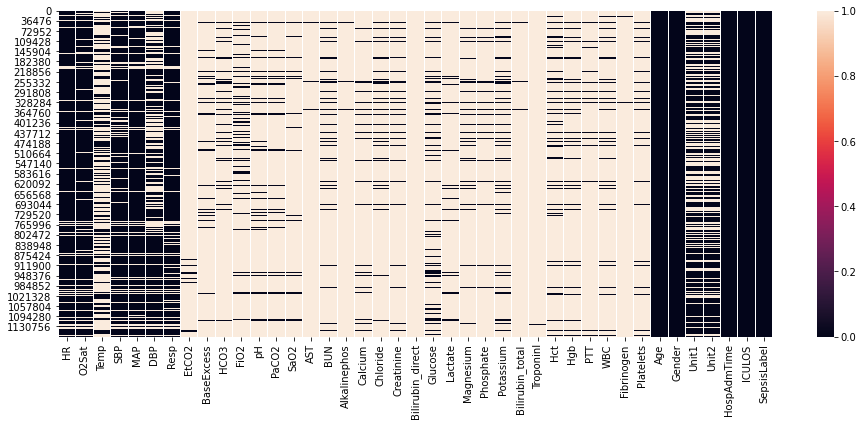

In [19]:
plt.figure(figsize=(16, 6))
sns.heatmap(data_train_test.isnull())

**parameters**

In [20]:
selected_cols = list(missing_percent[missing_percent < 92].index)
selected_cols

['pH',
 'Potassium',
 'Hct',
 'FiO2',
 'Glucose',
 'Temp',
 'Unit1',
 'Unit2',
 'DBP',
 'SBP',
 'Resp',
 'O2Sat',
 'MAP',
 'HR',
 'HospAdmTime',
 'ICULOS',
 'Age',
 'Gender',
 'SepsisLabel']

**filtered the dataset by removing the variables having 92% and above missing elements**

In [21]:
filter_train = data_train_test[selected_cols]
filter_train.head()

,pH,Potassium,Hct,FiO2,Glucose,Temp,Unit1,Unit2,DBP,SBP,Resp,O2Sat,MAP,HR,HospAdmTime,ICULOS,Age,Gender,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,13.5,100.0,71.0,99.0,-0.02,2,69.66,0,0
1,7.19,4.4,26.9,NaN,73.0,NaN,1.0,0.0,NaN,NaN,15.0,100.0,NaN,97.5,-0.02,3,69.66,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,13.0,100.0,70.0,96.0,-0.02,4,69.66,0,0
3,7.24,4.7,NaN,NaN,85.0,NaN,1.0,0.0,NaN,NaN,14.0,99.0,75.0,100.0,-0.02,5,69.66,0,0
4,NaN,NaN,NaN,NaN,NaN,36.0,1.0,0.0,NaN,NaN,17.0,100.0,74.0,102.0,-0.02,6,69.66,0,0


In [22]:
categorical = filter_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [23]:
cat_var = list(categorical[categorical].index)
cont_var = list(categorical[~categorical].index)
cont_var.pop(-1)

'SepsisLabel'

In [24]:
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

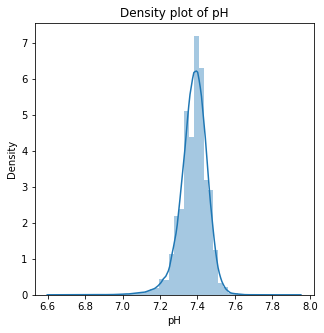

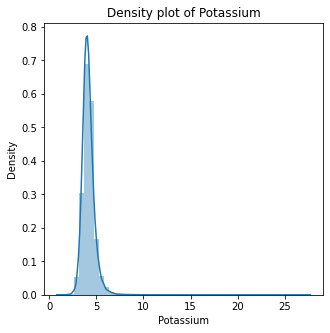

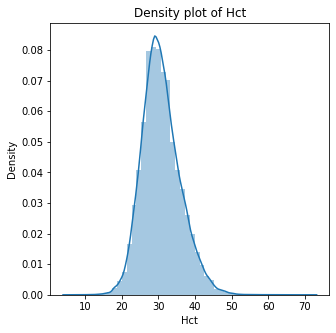

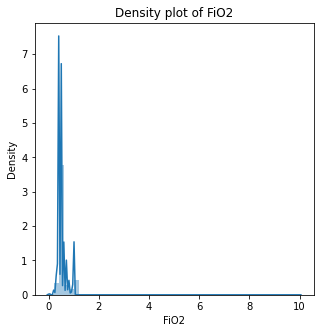

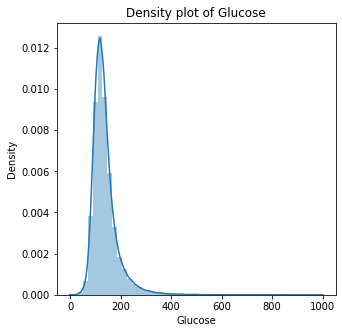

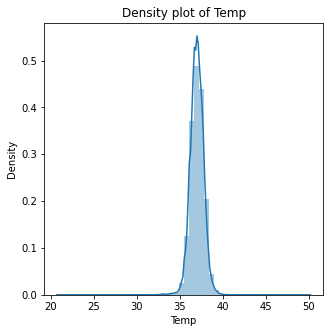

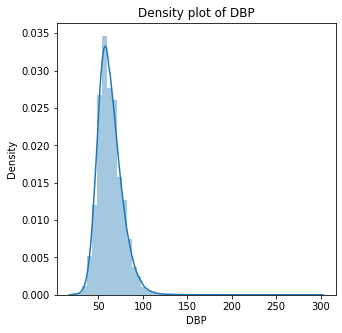

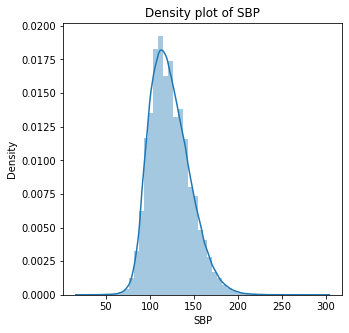

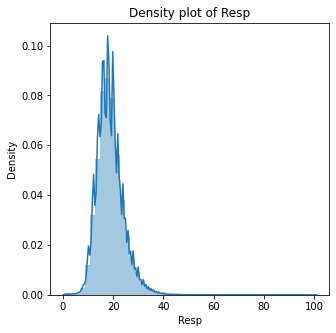

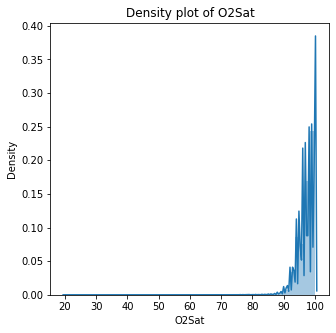

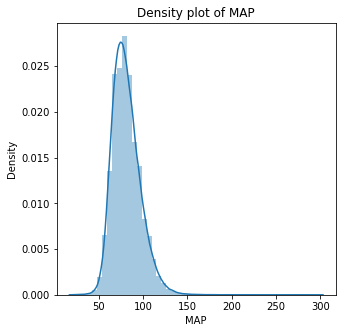

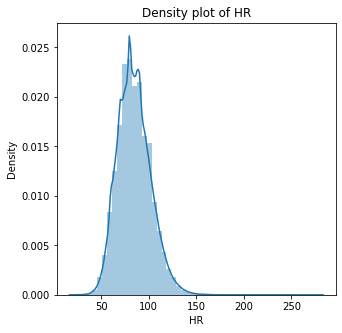

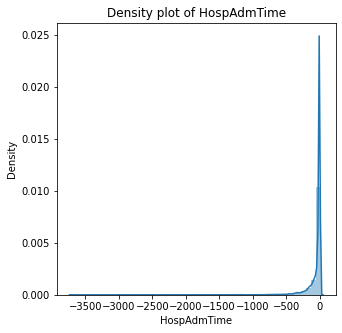

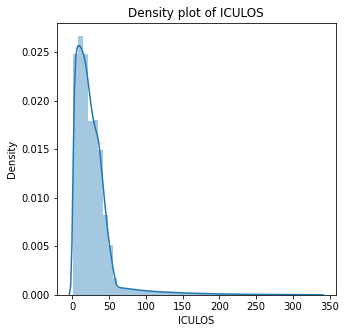

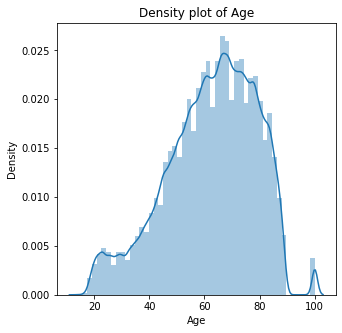

In [27]:
rcParams['figure.figsize'] = 5, 5
for i,var in enumerate(cont_var):
    plt.figure(i)
    plt.title("Density plot of " + str(var))
    sns.distplot(filter_train[var].dropna(), axlabel=var);

**SepsisLabel Distribution**

In [28]:
filter_train.SepsisLabel.value_counts()

0    1144776
1      22426
Name: SepsisLabel, dtype: int64

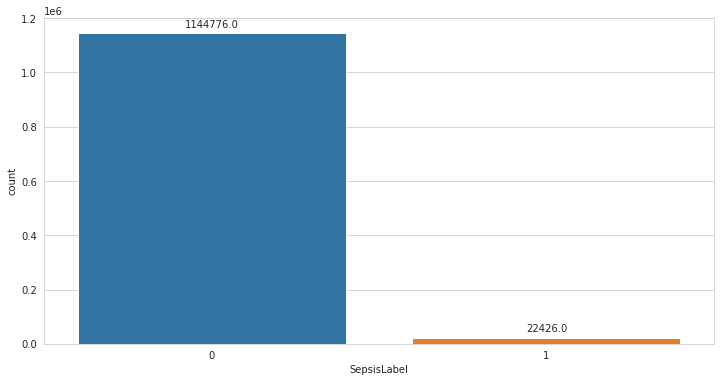

In [29]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax=sns.countplot(x='SepsisLabel', data= filter_train)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

**Gender-wise sepsisLabel 0=female , 1=male**

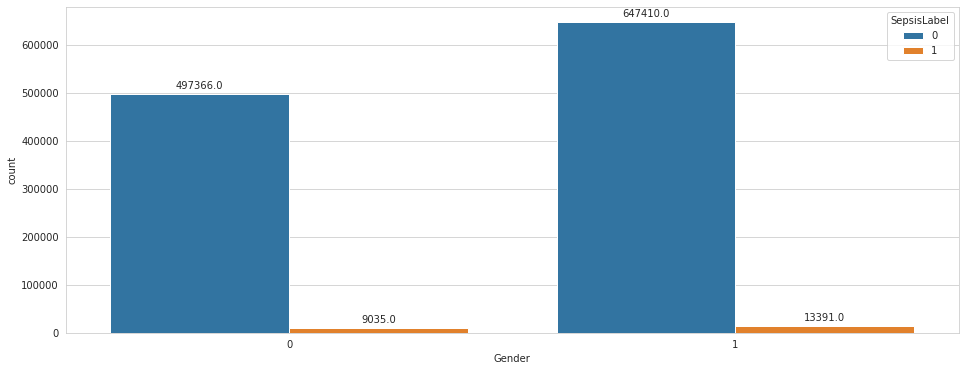

In [30]:
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
ax=sns.countplot(x='Gender', hue='SepsisLabel', data=filter_train)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

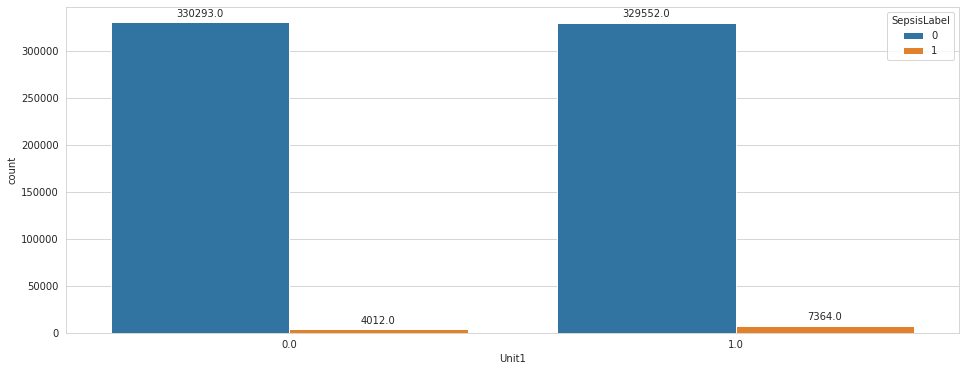

In [31]:
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
ax=sns.countplot(x='Unit1', hue='SepsisLabel', data=filter_train)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

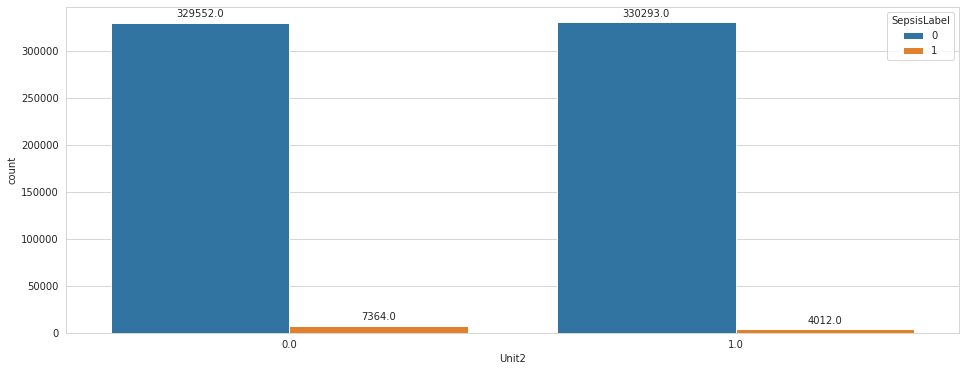

In [32]:
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
ax=sns.countplot(x='Unit2', hue='SepsisLabel', data=filter_train)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level f

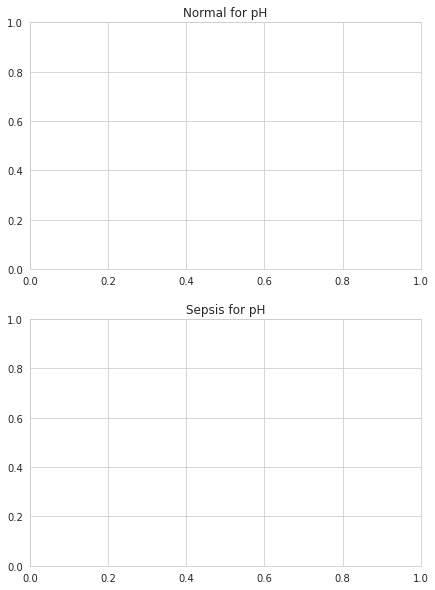

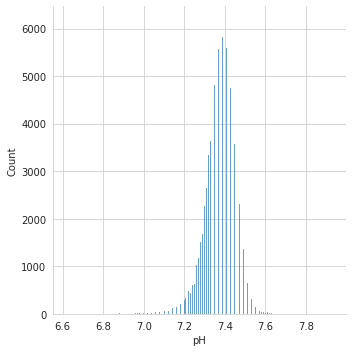

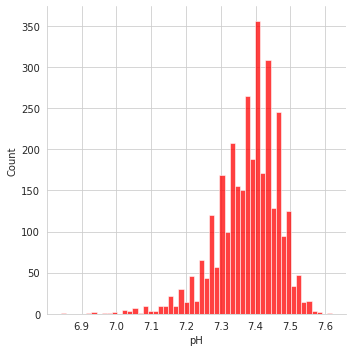

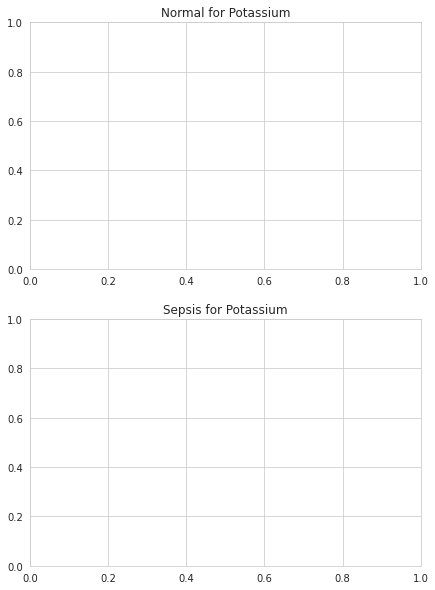

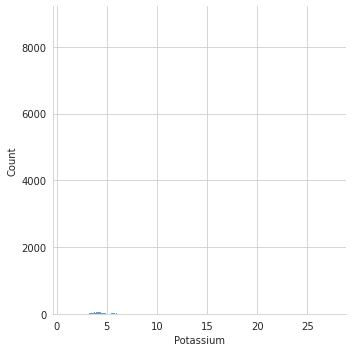

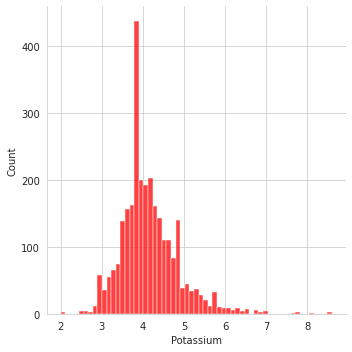

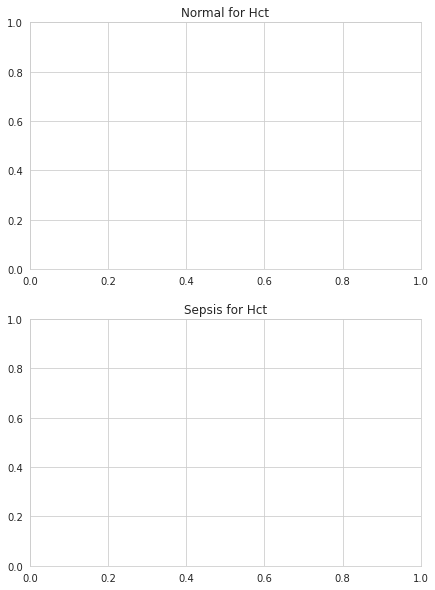

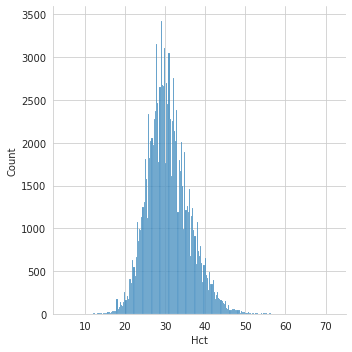

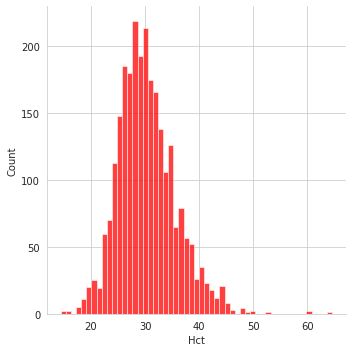

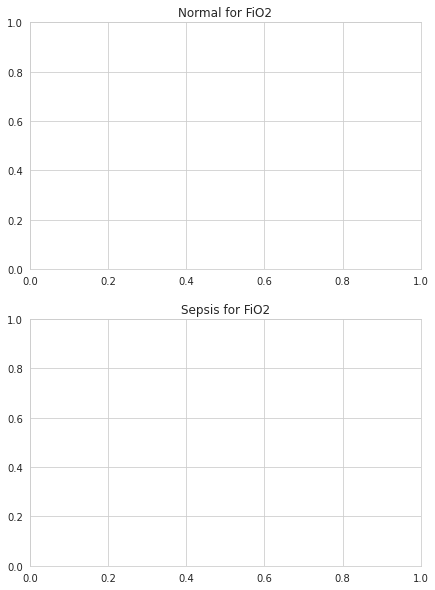

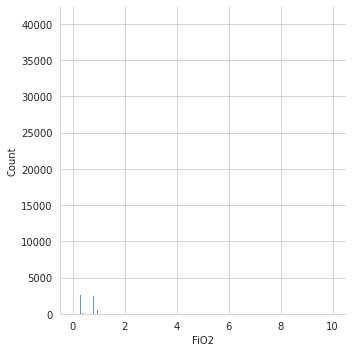

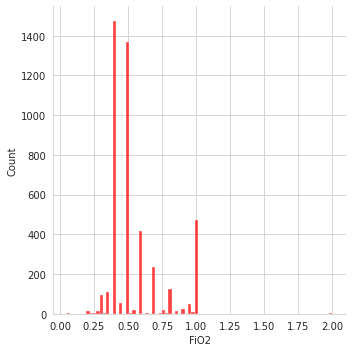

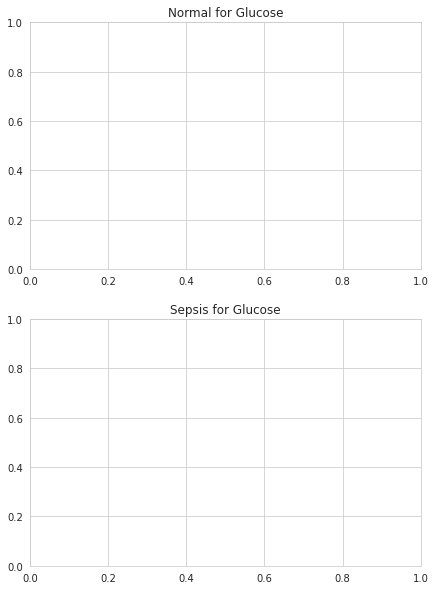

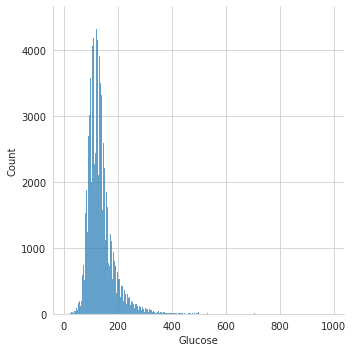

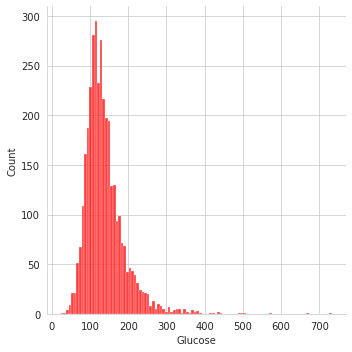

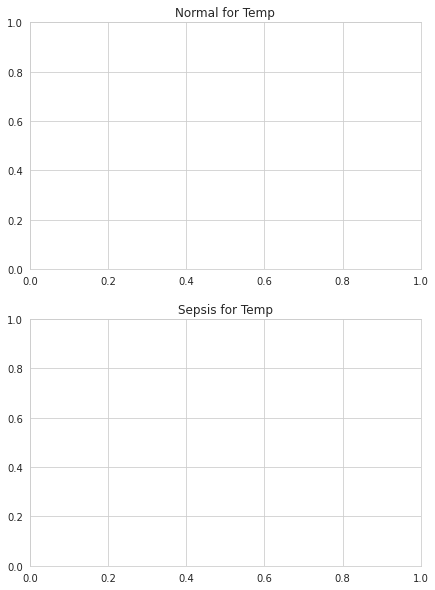

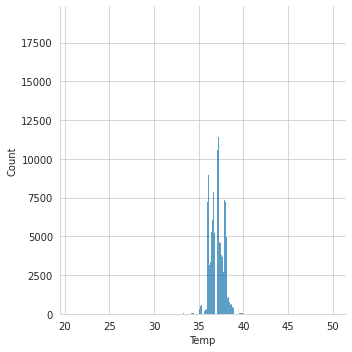

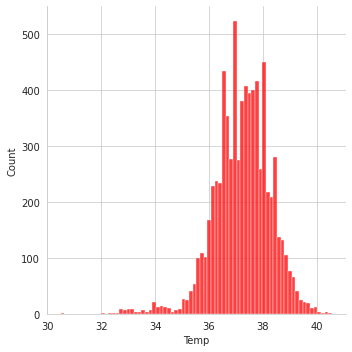

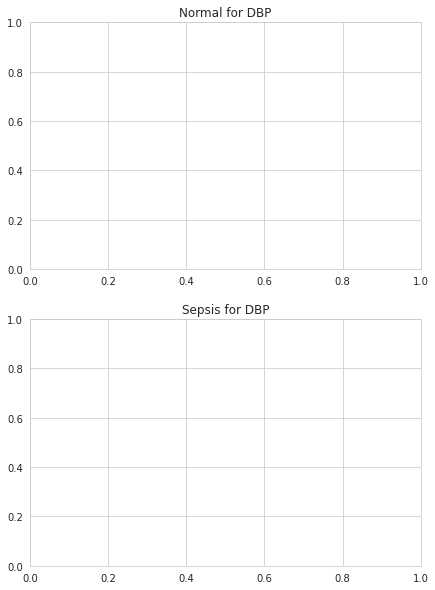

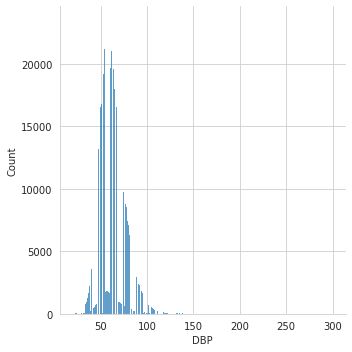

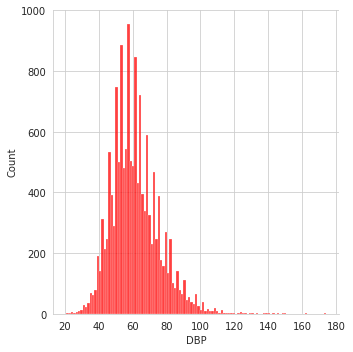

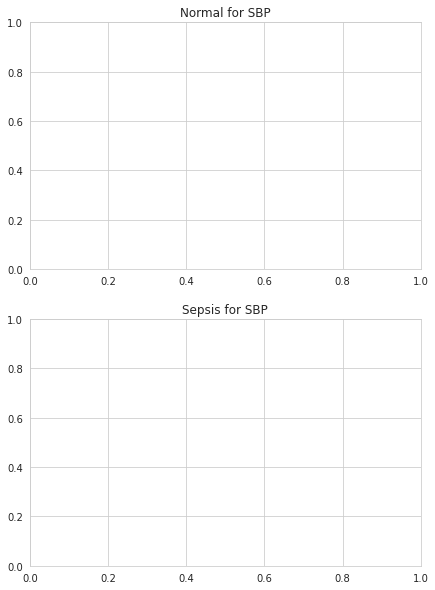

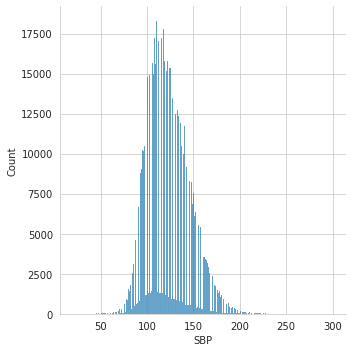

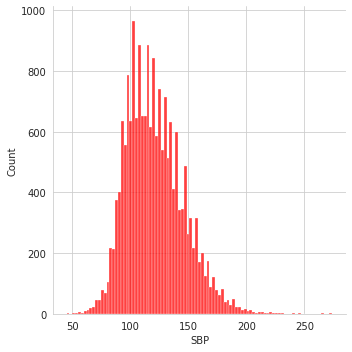

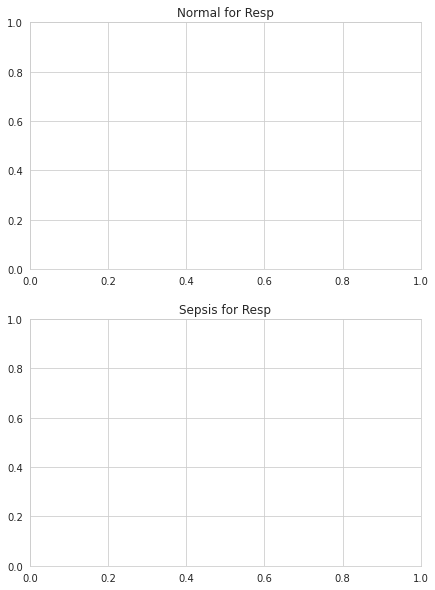

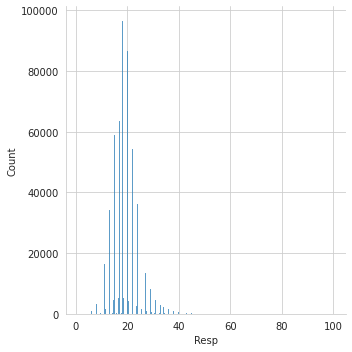

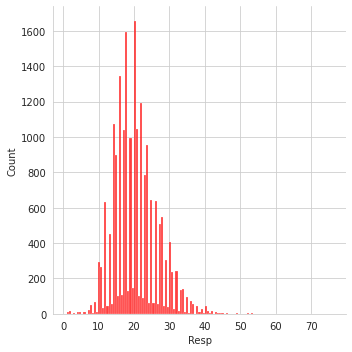

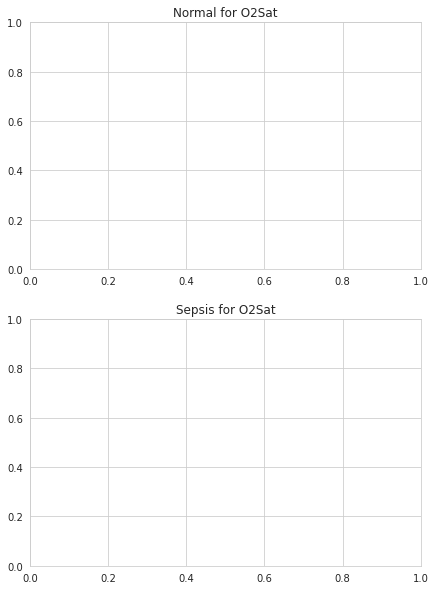

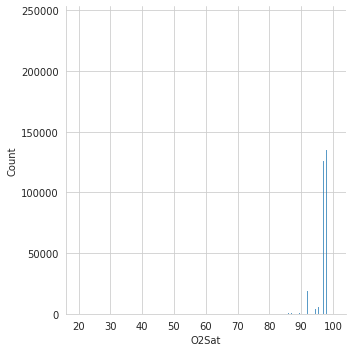

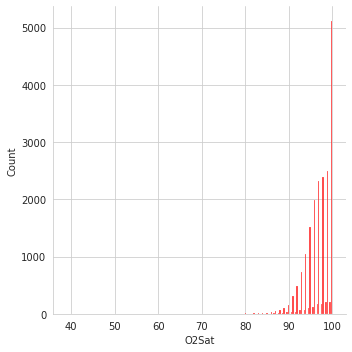

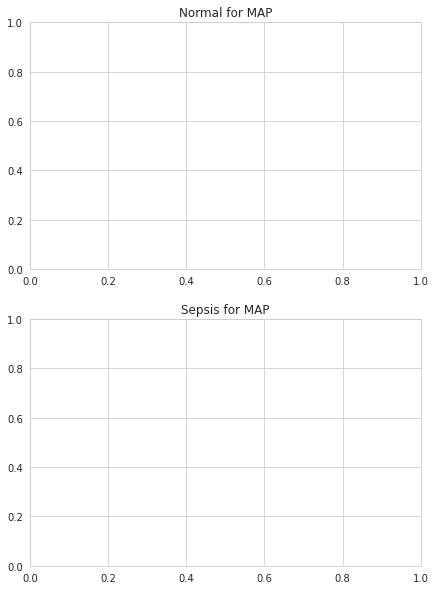

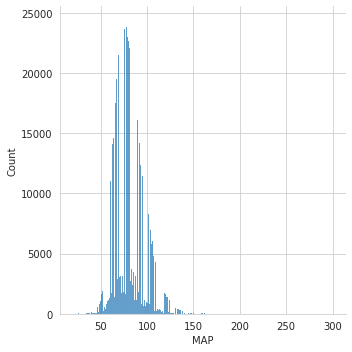

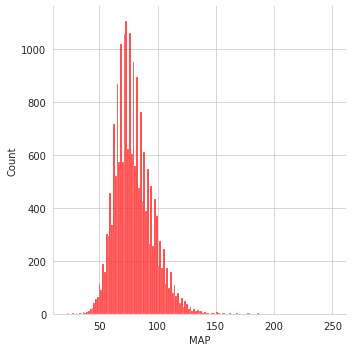

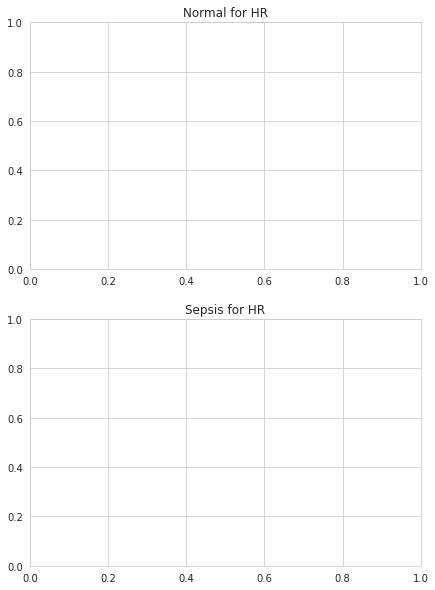

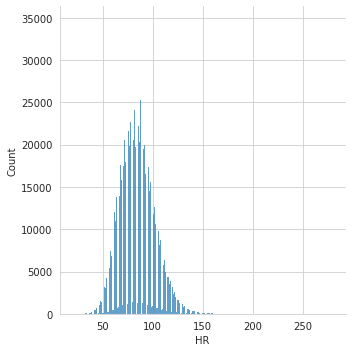

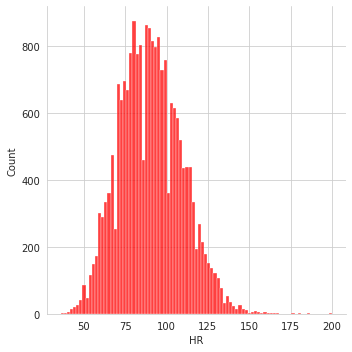

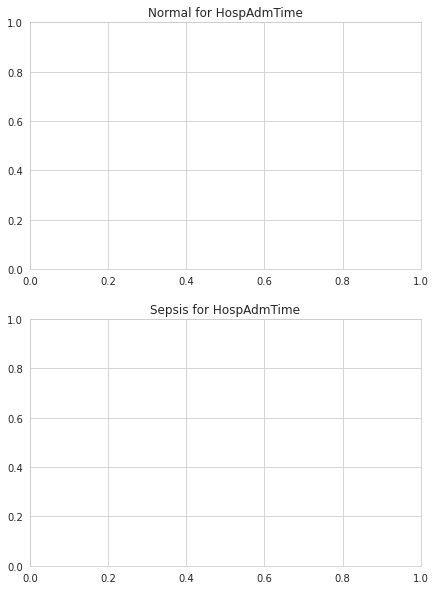

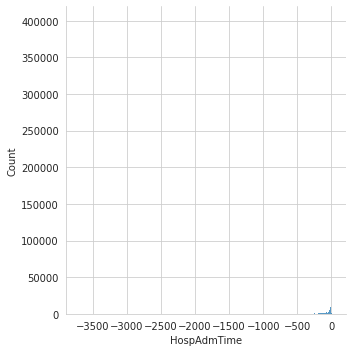

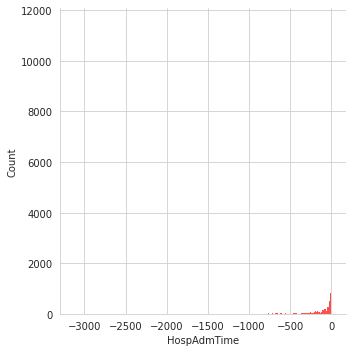

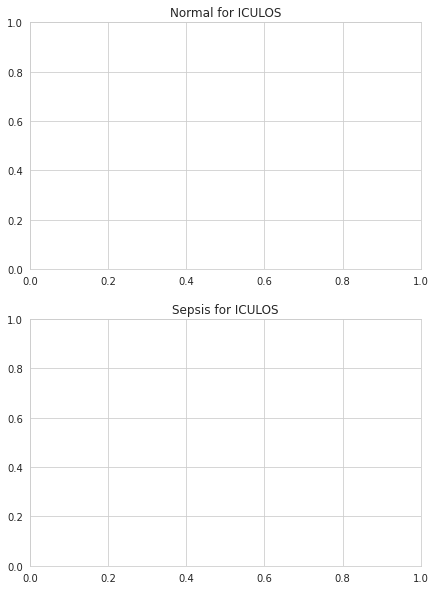

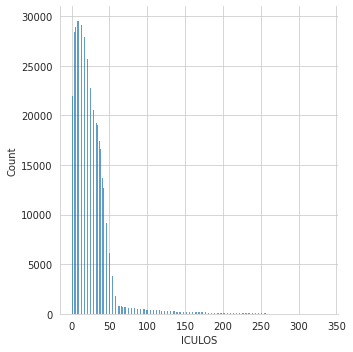

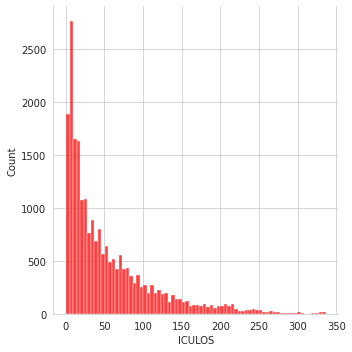

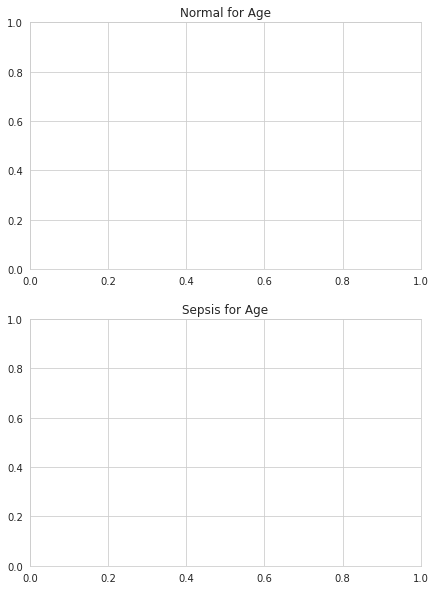

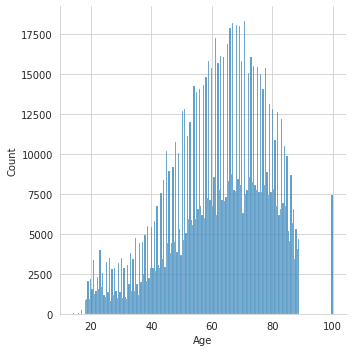

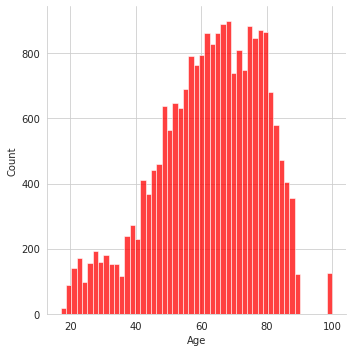

In [71]:
for i,var in enumerate(cont_var):
    temp = filter_train[[var,'SepsisLabel']].dropna()
    temp1 = temp[temp['SepsisLabel']==0]
    temp2 = temp[temp['SepsisLabel']==1]
    fig, ax = plt.subplots(2, 1, figsize=(7, 10))

    sns.displot(temp1[var], ax=ax[0])
    sns.displot(temp2[var], ax=ax[1], color='red')
    ax[0].set_title("Normal for " + var)
    ax[1].set_title("Sepsis for " + var)

**kernel density distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

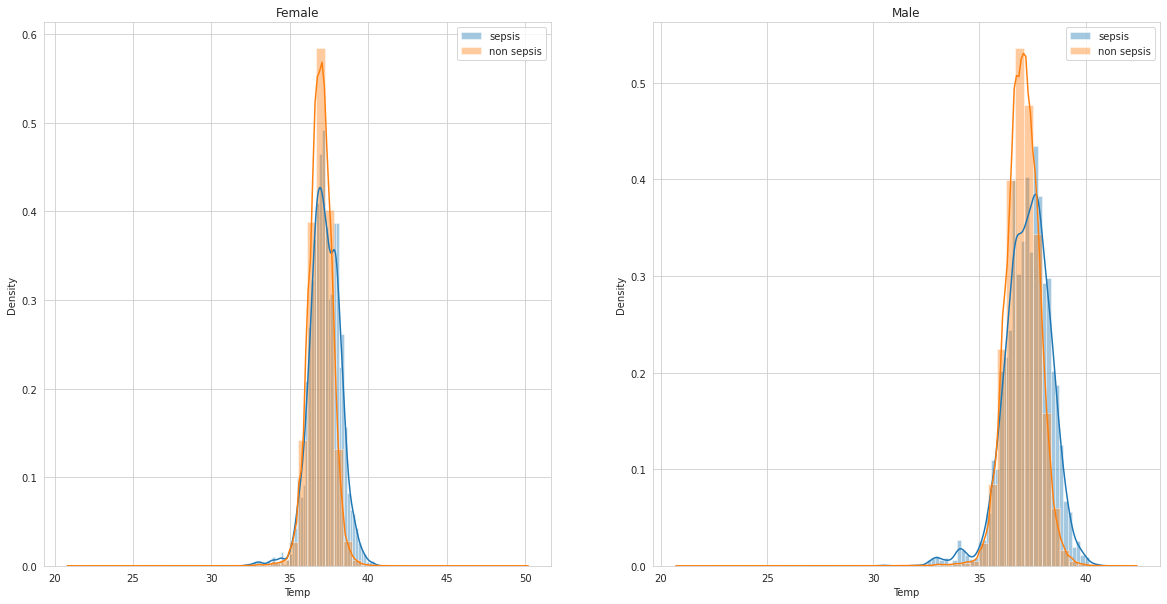

In [74]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].Temp.dropna(), label = sepsis, ax = axes[0], kde =True,hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].Temp.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].Temp.dropna(), label = sepsis, ax = axes[1], kde = True,hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].Temp.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

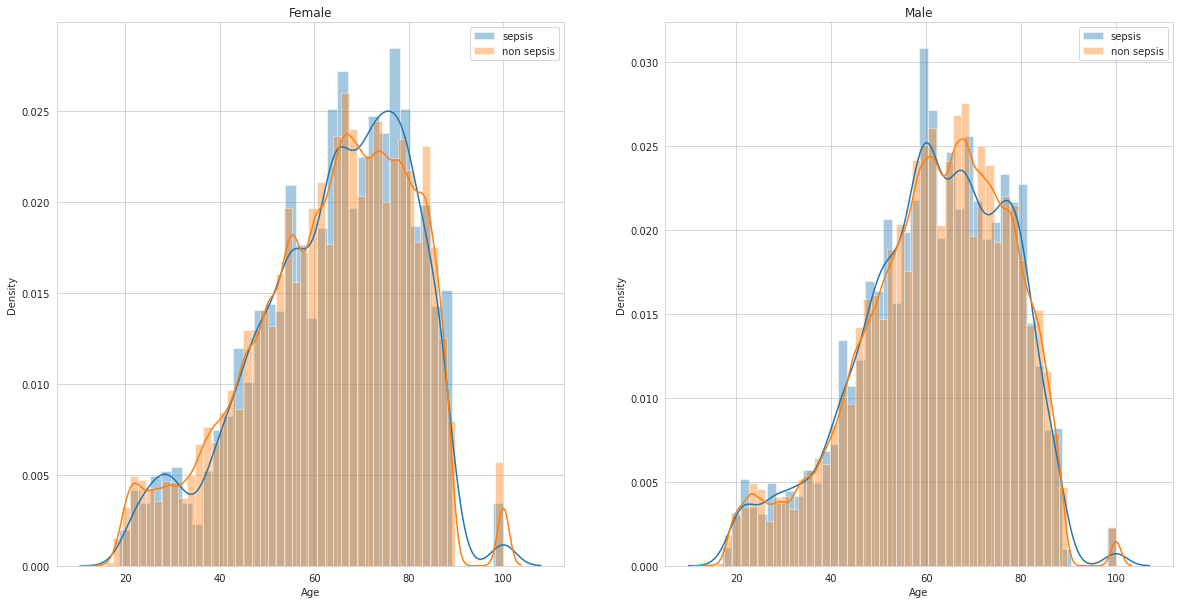

In [58]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.displot(women[women['SepsisLabel']==1].Age.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.displot(women[women['SepsisLabel']==0].Age.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.displot(men[men['SepsisLabel']==1].Age.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.displot(men[men['SepsisLabel']==0].Age.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

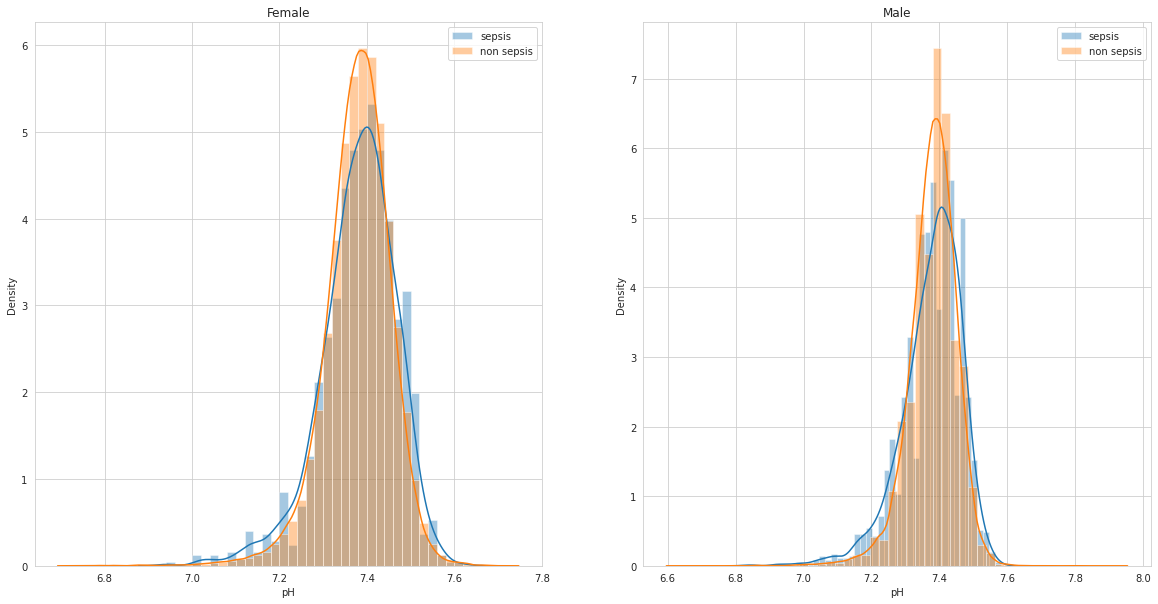

In [59]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].pH.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].pH.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].pH.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].pH.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

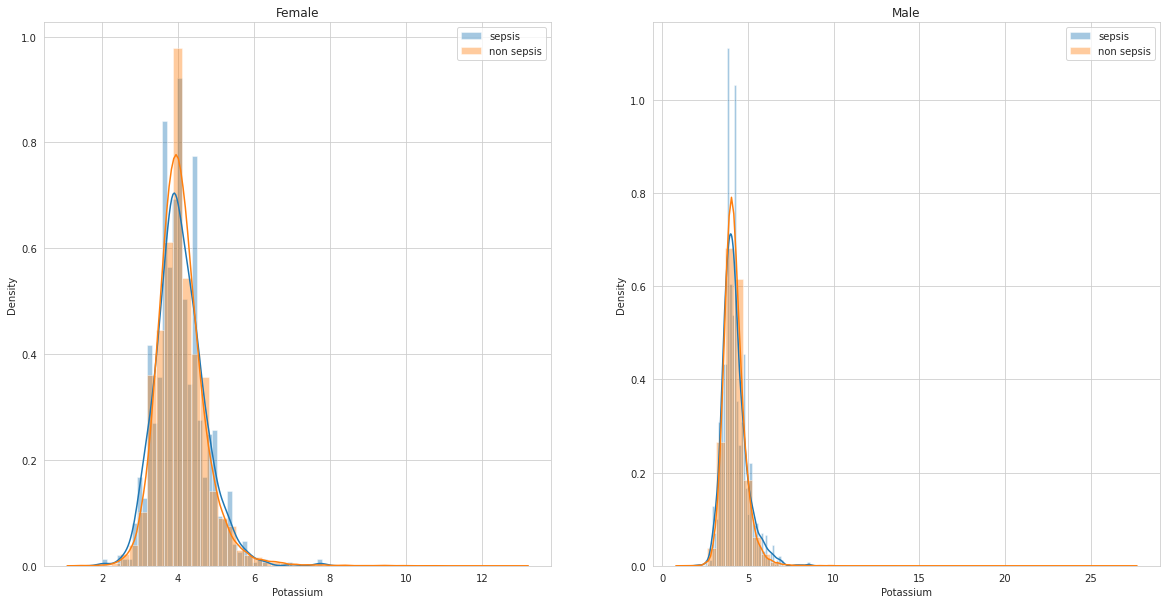

In [60]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].Potassium.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].Potassium.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].Potassium.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].Potassium.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

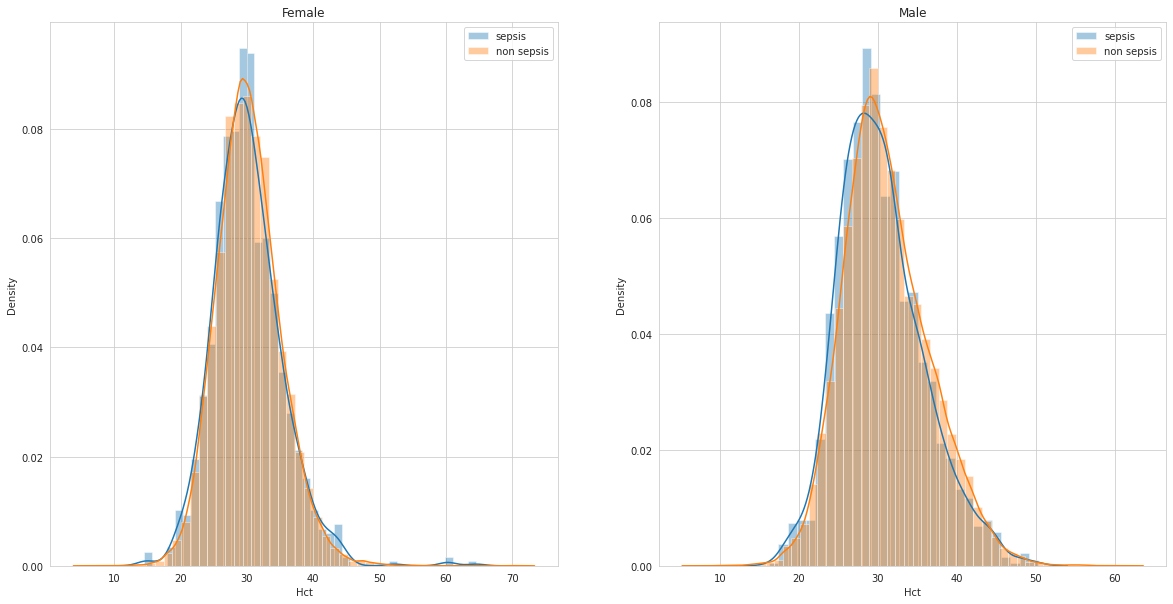

In [61]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].Hct.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].Hct.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].Hct.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].Hct.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

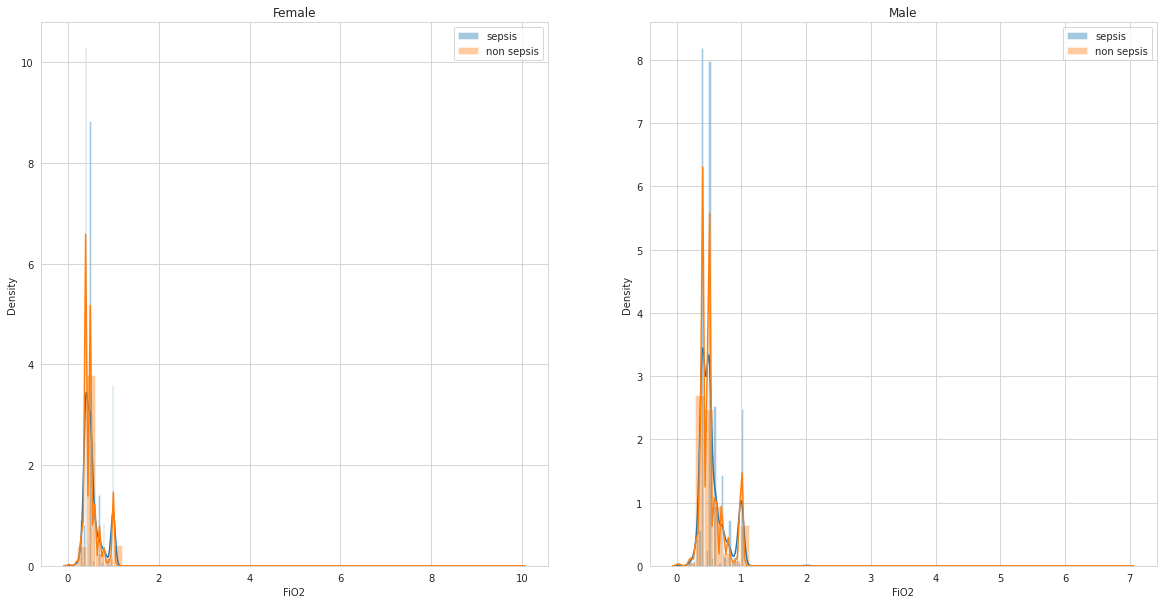

In [62]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].FiO2.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].FiO2.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].FiO2.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].FiO2.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

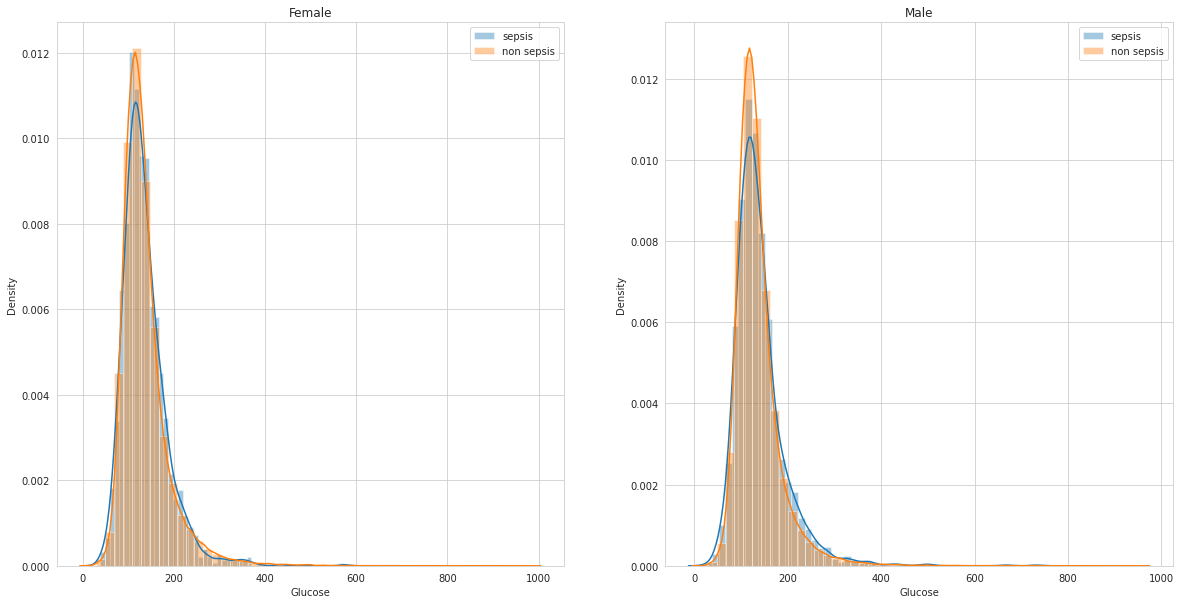

In [63]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].Glucose.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].Glucose.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].Glucose.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].Glucose.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

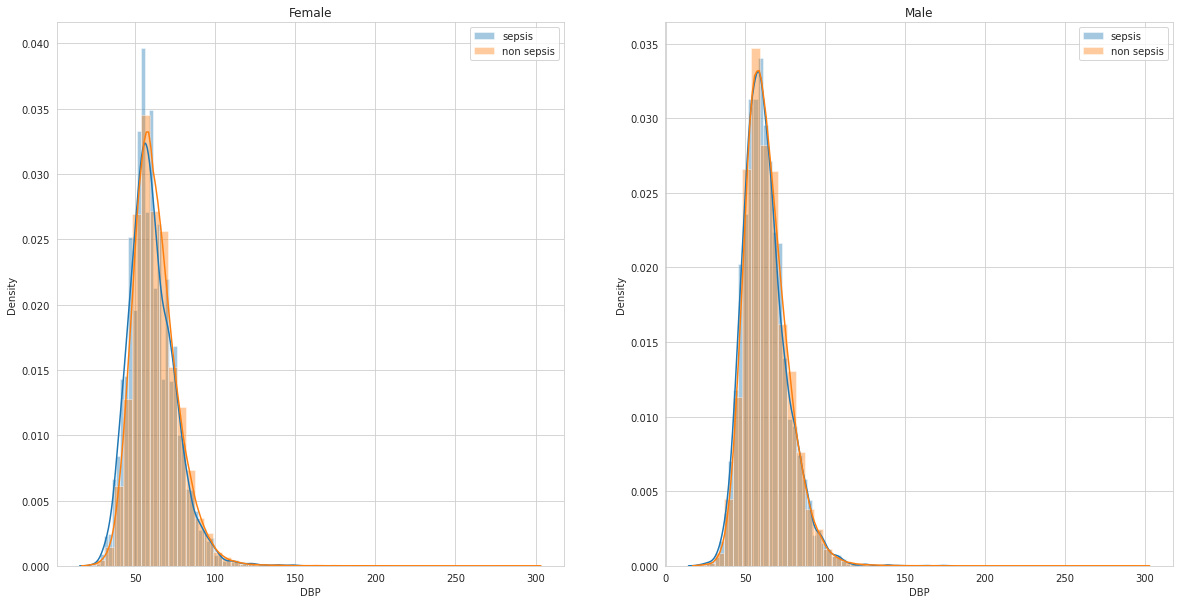

In [64]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].DBP.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].DBP.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].DBP.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].DBP.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

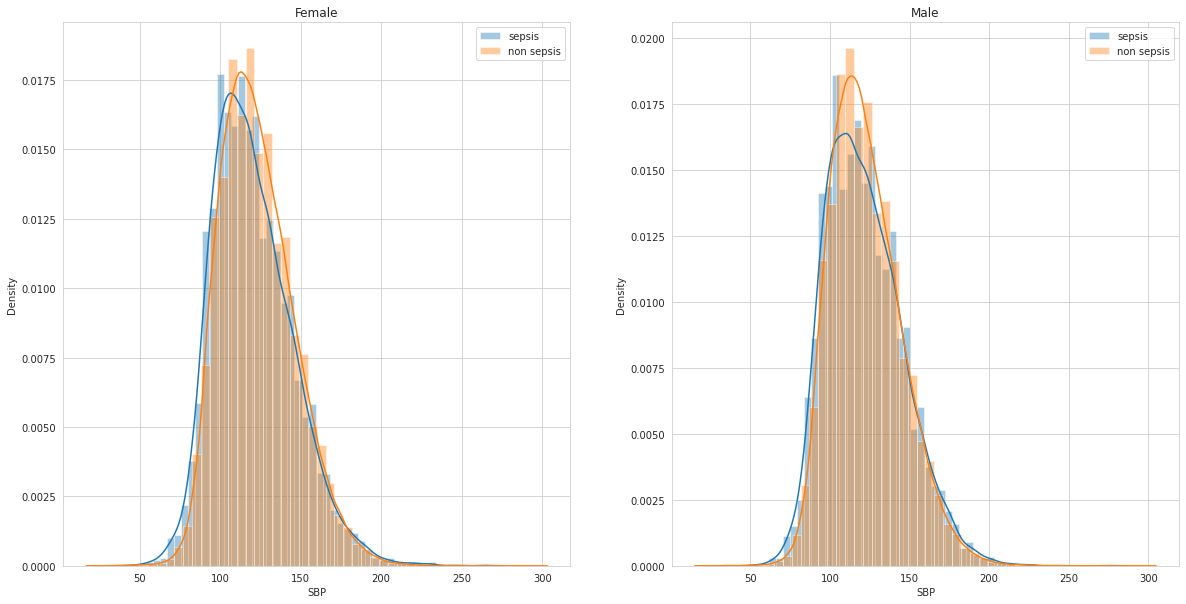

In [65]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].SBP.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].SBP.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].SBP.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].SBP.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

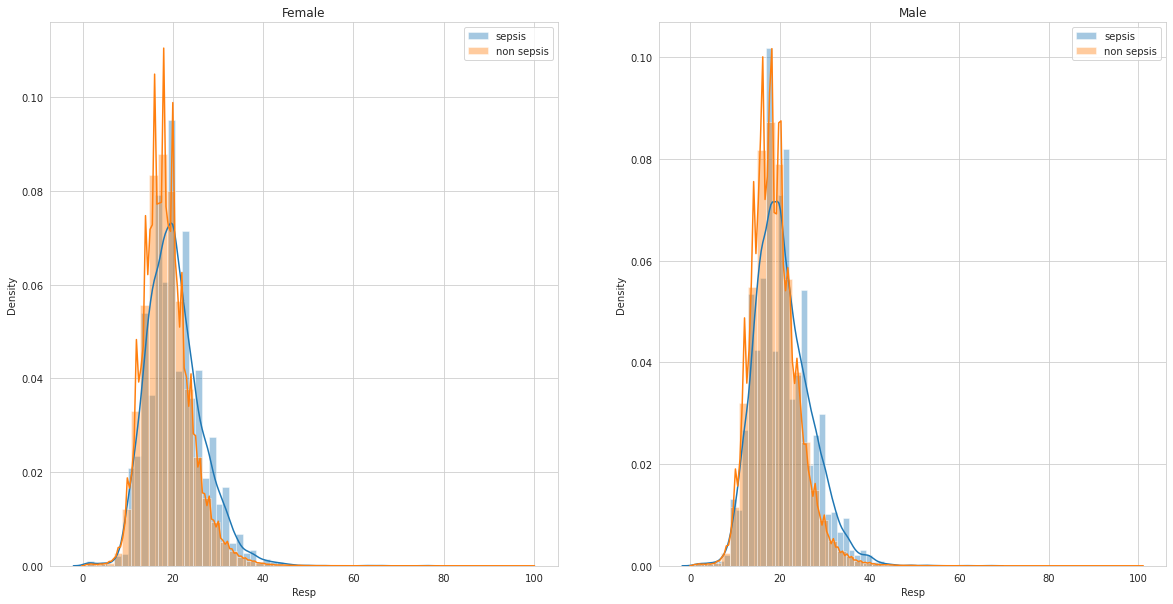

In [66]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].Resp.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].Resp.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].Resp.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].Resp.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

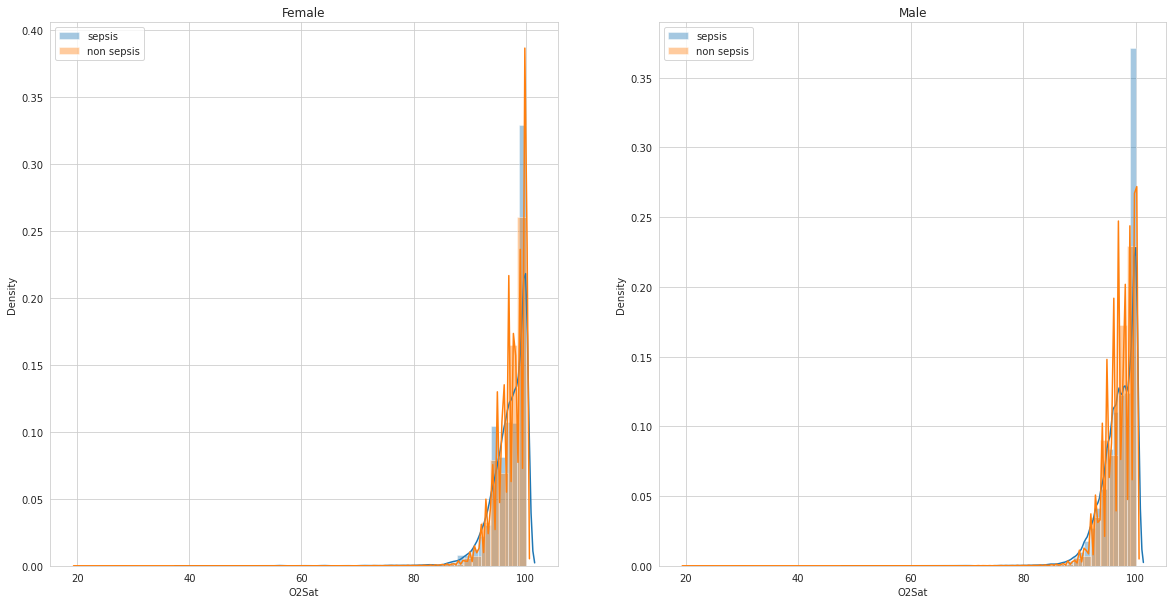

In [67]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].O2Sat.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].O2Sat.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].O2Sat.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].O2Sat.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

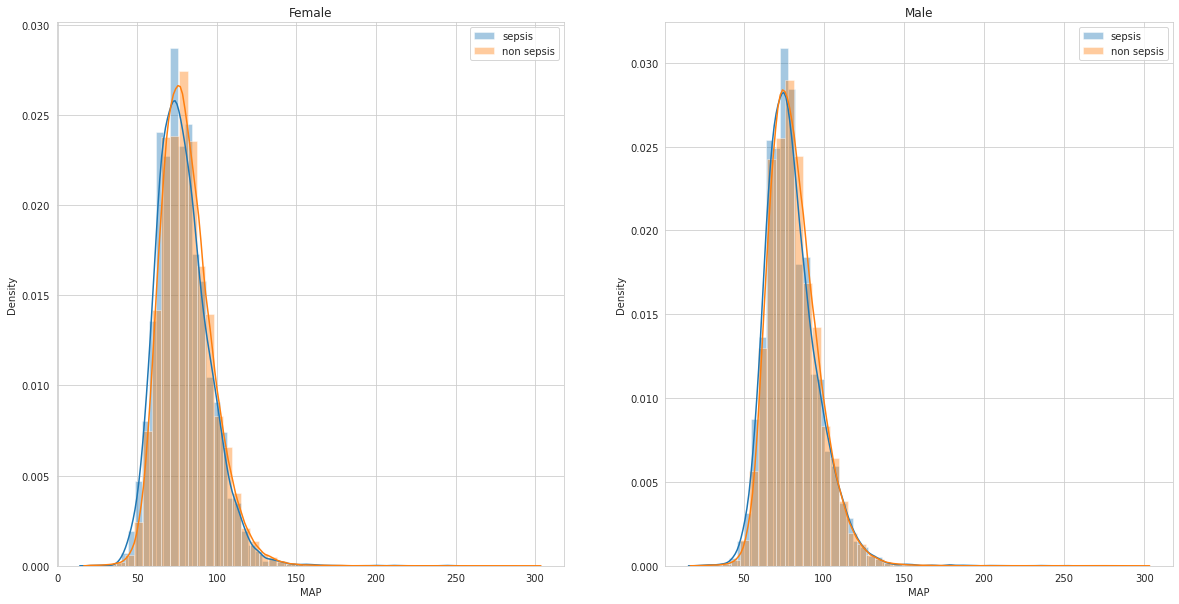

In [68]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].MAP.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].MAP.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].MAP.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].MAP.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

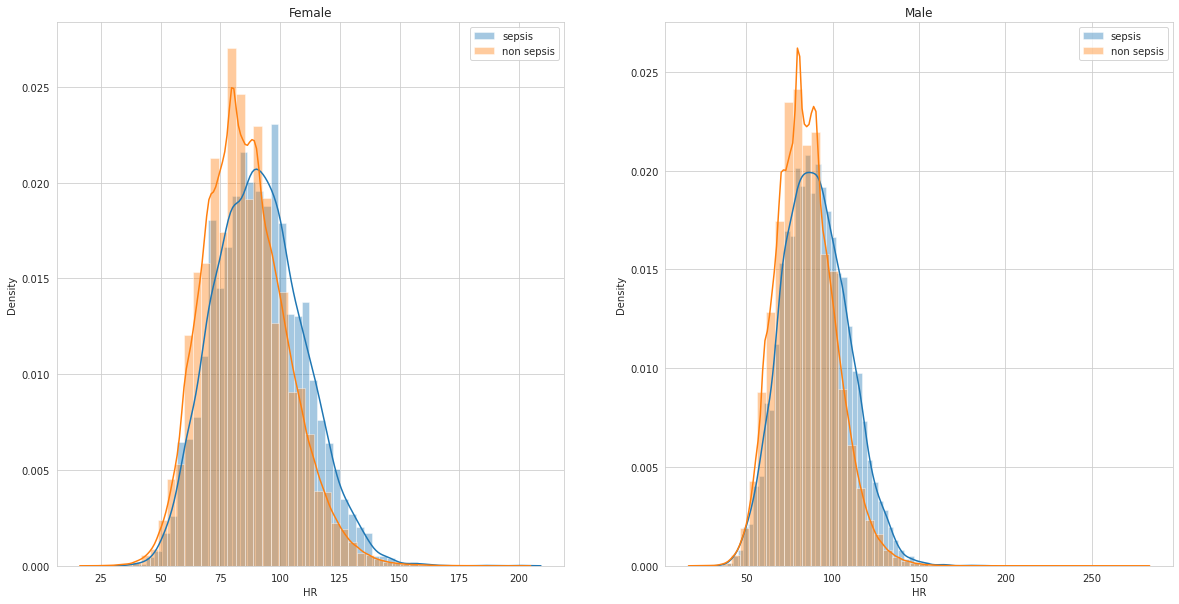

In [69]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].HR.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].HR.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].HR.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].HR.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

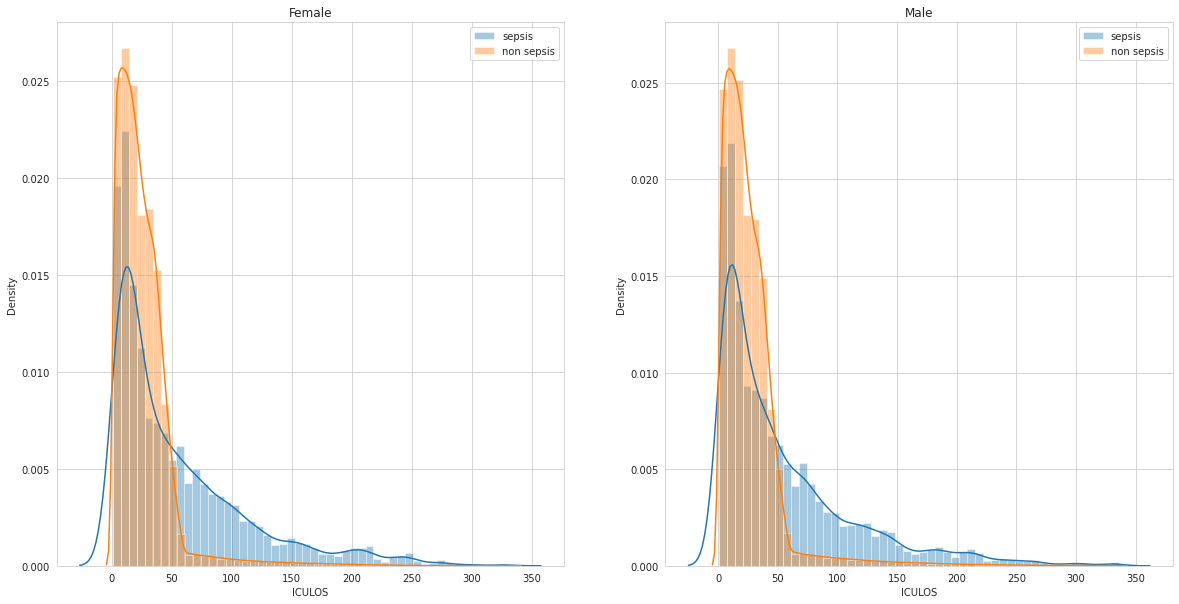

In [70]:
sepsis = 'sepsis'
non_sepsis = 'non sepsis'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
women = filter_train[filter_train['Gender']==0]
men = filter_train[filter_train['Gender']==1]
ax = sns.distplot(women[women['SepsisLabel']==1].ICULOS.dropna(), label = sepsis, ax = axes[0], kde =True, hist=True)
ax = sns.distplot(women[women['SepsisLabel']==0].ICULOS.dropna(), label = non_sepsis, ax = axes[0], kde =True, hist=True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['SepsisLabel']==1].ICULOS.dropna(), label = sepsis, ax = axes[1], kde = True, hist=True)
ax = sns.distplot(men[men['SepsisLabel']==0].ICULOS.dropna(), label = non_sepsis, ax = axes[1], kde = True, hist=True)
ax.legend()
_ = ax.set_title('Male')

In [48]:
filter_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pH,98926.0,7.379360,0.073434,6.62,7.34,7.38,7.43,7.93
Potassium,114657.0,4.144965,0.638114,1.00,3.70,4.10,4.50,27.50
Hct,114927.0,30.769380,5.254683,5.50,27.20,30.30,33.90,71.70
FiO2,120467.0,0.525748,0.190485,0.00,0.40,0.50,0.60,10.00
Glucose,179507.0,136.163727,51.647692,10.00,105.50,126.00,153.00,988.00
Temp,394625.0,36.993541,0.772304,20.90,36.50,37.00,37.50,50.00
Unit1,671221.0,0.501945,0.499997,0.00,0.00,1.00,1.00,1.00
Unit2,671221.0,0.498055,0.499997,0.00,0.00,0.00,1.00,1.00
DBP,733099.0,62.805455,13.715634,20.00,53.00,61.00,70.50,300.00
SBP,993285.0,122.800077,22.663882,20.00,106.00,120.00,137.00,300.00


**baseline**

In [75]:
features = cont_var + cat_var
features

['pH',
 'Potassium',
 'Hct',
 'FiO2',
 'Glucose',
 'Temp',
 'DBP',
 'SBP',
 'Resp',
 'O2Sat',
 'MAP',
 'HR',
 'HospAdmTime',
 'ICULOS',
 'Age',
 'Unit1',
 'Unit2',
 'Gender']

In [76]:
X_train = filter_train[features]
y_train = filter_train['SepsisLabel']

In [77]:
categorical = X_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier

In [79]:
cont_scale_pipeline = make_pipeline(SimpleImputer(strategy = "median"), 
                                    StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = "constant", 
                                           fill_value = 999), 
                             OneHotEncoder(handle_unknown="ignore"))
preprocess_trans_scale = make_column_transformer((cont_scale_pipeline, 
                                                  ~categorical), 
                                                 (cat_pipeline, categorical))

In [80]:
logistic_pipe_scale = make_pipeline(preprocess_trans_scale, 
                                    LogisticRegression(solver='lbfgs') )
rf_pipe_scale = make_pipeline(preprocess_trans_scale, RandomForestClassifier())
svc_pipe_scale = make_pipeline(preprocess_trans_scale, SVC())
gb_pipe_scale = make_pipeline(preprocess_trans_scale, GradientBoostingClassifier())
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier() )
gmm_pipe_scale = make_pipeline(preprocess_trans_scale, GaussianMixture(n_components=2))
mlp_pipe_scale = make_pipeline(preprocess_trans_scale, MLPClassifier() )

In [81]:
scores_logistic_pipe_scale = cross_validate(logistic_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_rf_pipe_scale = cross_validate(rf_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_gb_pipe_scale = cross_validate(gb_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])
scores_dt_pipe_scale = cross_validate(dt_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])


scores_gmm_pipe_scale = cross_validate(gmm_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

scores_mlp_pipe_scale = cross_validate(mlp_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

In [82]:
log_df = pd.DataFrame(scores_logistic_pipe_scale)
log_df['model'] = 'LogisticRegression'

dt_df = pd.DataFrame(scores_dt_pipe_scale)
dt_df['model'] = 'DecisionTree'

gb_df = pd.DataFrame(scores_gb_pipe_scale)
gb_df['model'] = 'GradientBoosting'

rf_df = pd.DataFrame(scores_rf_pipe_scale)
rf_df['model'] = 'RandomForest'

gmm_df = pd.DataFrame(scores_gmm_pipe_scale)
gmm_df['model'] = 'GMM'

mlp_df = pd.DataFrame(scores_mlp_pipe_scale)
mlp_df['model'] = 'MLP'




results = pd.concat([log_df, dt_df, gb_df, rf_df, gmm_df, mlp_df])

In [83]:
results

,fit_time,score_time,test_average_precision,test_roc_auc,test_precision,test_recall,model
0,8.794904,1.430686,0.073163,0.726452,0.131579,0.002675,LogisticRegression
1,8.766293,1.406807,0.075917,0.732501,0.198198,0.002943,LogisticRegression
2,5.800946,1.409787,0.072738,0.724424,0.215116,0.004950,LogisticRegression
0,18.067798,1.349190,0.116599,0.663818,0.303052,0.342697,DecisionTree
1,18.520864,1.335541,0.103835,0.653975,0.280166,0.324281,DecisionTree
2,18.951010,1.344206,0.119036,0.667381,0.304015,0.350502,DecisionTree
0,263.654527,2.509334,0.123281,0.791217,0.576577,0.008561,GradientBoosting
1,260.469040,2.456734,0.118317,0.794893,0.476190,0.009365,GradientBoosting
2,259.257805,2.502187,0.123024,0.792774,0.520000,0.010435,GradientBoosting
0,278.591072,22.517959,0.461327,0.933048,0.904669,0.062199,RandomForest
